In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from os.path import join
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
})

In [4]:
csv_path = "../../results/sslvr-domain.csv"

In [5]:
df = pd.read_csv(csv_path, index_col=0)

In [6]:
df

,UCF101,NTU,SS (V2),FineGym,EPIC (Verb)
None,75.36,92.87,56.81,89.41,25.67
SeLaVi,84.88,92.78,56.37,88.93,33.77
RSPNet,85.59,93.51,53.75,89.88,36.22
VideoMoCo,85.83,94.09,58.75,90.54,43.61
Pretext-contrast,86.60,93.86,54.03,90.31,34.29
CTP,89.77,94.31,60.16,92.17,42.84
TCLR,90.77,94.11,59.64,91.49,36.18
GDT,91.14,93.89,57.78,90.36,37.26
Supervised,94.08,93.89,61.02,91.77,47.67


In [7]:
df.columns = [["UCF101", "NTU", "Something-something", "FineGym", "EPIC (Verb)"]]

In [8]:
df

,UCF101,NTU,Something-something,FineGym,EPIC (Verb)
None,75.36,92.87,56.81,89.41,25.67
SeLaVi,84.88,92.78,56.37,88.93,33.77
RSPNet,85.59,93.51,53.75,89.88,36.22
VideoMoCo,85.83,94.09,58.75,90.54,43.61
Pretext-contrast,86.60,93.86,54.03,90.31,34.29
CTP,89.77,94.31,60.16,92.17,42.84
TCLR,90.77,94.11,59.64,91.49,36.18
GDT,91.14,93.89,57.78,90.36,37.26
Supervised,94.08,93.89,61.02,91.77,47.67


### Column-wise normalized

In [9]:
norm_df=(df-df.loc["None"])/(df.loc["Supervised"]-df.loc["None"])

In [10]:
norm_df

,UCF101,NTU,Something-something,FineGym,EPIC (Verb)
None,0.000000,0.000000,0.000000,0.000000,0.000000
SeLaVi,0.508547,-0.088235,-0.104513,-0.203390,0.368182
RSPNet,0.546474,0.627451,-0.726841,0.199153,0.479545
VideoMoCo,0.559295,1.196078,0.460808,0.478814,0.815455
Pretext-contrast,0.600427,0.970588,-0.660333,0.381356,0.391818
CTP,0.769765,1.411765,0.795724,1.169492,0.780455
TCLR,0.823184,1.215686,0.672209,0.881356,0.477727
GDT,0.842949,1.000000,0.230404,0.402542,0.526818
Supervised,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
def heatmap(df, titlesize=20, labelsize=15, tickssize=13):
    fig, ax = plt.subplots(1, 1, figsize=(7, 6))

    sns.heatmap(df, cmap="YlGnBu", ax=ax)

    ax.set_title("Action classification", fontsize=titlesize)

    ax.set_xlabel("Dataset")
    ax.set_ylabel("Method")
    
    ax.yaxis.label.set_size(labelsize)
    ax.xaxis.label.set_size(labelsize)

    ax.tick_params(axis='x', labelsize=tickssize)
    ax.tick_params(axis='y', labelsize=tickssize)

    plt.show()

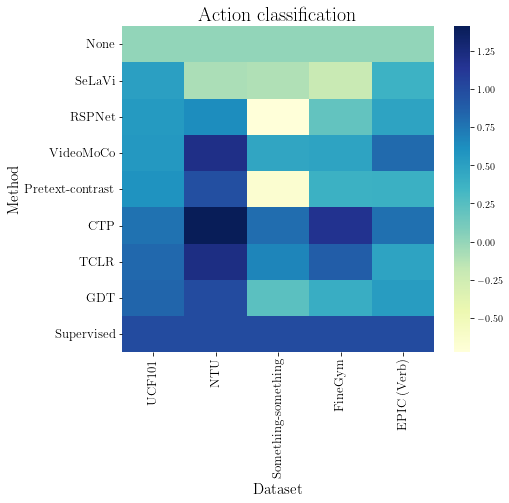

In [12]:
heatmap(norm_df)

### Normalizing between 0-1

In [13]:
normalized_df=(df-df.min())/(df.max()-df.min())

In [14]:
normalized_df

,UCF101,NTU,Something-something,FineGym,EPIC (Verb)
None,0.000000,0.058824,0.420908,0.148148,0.000000
SeLaVi,0.508547,0.000000,0.360385,0.000000,0.368182
RSPNet,0.546474,0.477124,0.000000,0.293210,0.479545
VideoMoCo,0.559295,0.856209,0.687758,0.496914,0.815455
Pretext-contrast,0.600427,0.705882,0.038514,0.425926,0.391818
CTP,0.769765,1.000000,0.881706,1.000000,0.780455
TCLR,0.823184,0.869281,0.810179,0.790123,0.477727
GDT,0.842949,0.725490,0.554333,0.441358,0.526818
Supervised,1.000000,0.725490,1.000000,0.876543,1.000000


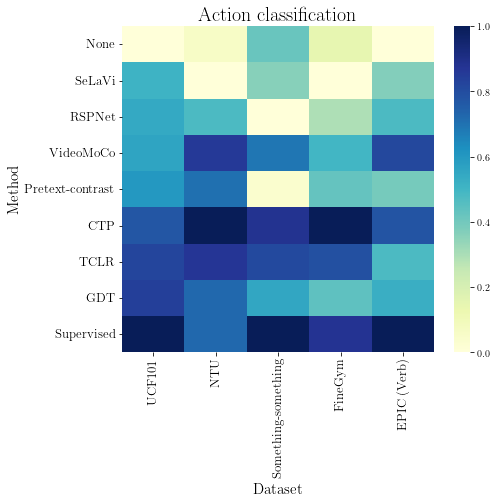

In [15]:
heatmap(normalized_df)

In [20]:
normalized_df.var()

UCF101                 0.082945
NTU                    0.126099
Something-something    0.126459
FineGym                0.112671
EPIC (Verb)            0.087004
dtype: float64

In [17]:
df.var()

UCF101                 29.067150
NTU                     0.295186
Something-something     6.683750
FineGym                 1.182775
EPIC (Verb)            42.110111
dtype: float64

In [18]:
normalized_df.mean()

UCF101                 0.627849
NTU                    0.602033
Something-something    0.528198
FineGym                0.496914
EPIC (Verb)            0.537778
dtype: float64